### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
tienda["tienda"] = "tienda_1"
tienda2["tienda"] = "tienda_2"
tienda3["tienda"] = "tienda_3"
tienda4["tienda"] = "tienda_4"

In [4]:
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [5]:
print(tiendas["tienda"].value_counts())
tiendas.head()

tienda
tienda_1    2359
tienda_2    2359
tienda_3    2359
tienda_4    2358
Name: count, dtype: int64


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda_1


#1. Análisis de facturación



In [19]:
print(tiendas.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [24]:
tiendas["facturacion"] = tiendas["Precio"] * tiendas["Cantidad de cuotas"]

In [26]:
facturacion_por_tienda = tiendas.groupby("tienda")["facturacion"].sum().reset_index()
facturacion_por_tienda.columns = ["Tienda", "Facturación total"]

print(facturacion_por_tienda)

     Tienda  Facturación total
0  tienda_1       3.422718e+09
1  tienda_2       3.337189e+09
2  tienda_3       3.243817e+09
3  tienda_4       3.098827e+09


# 2. Ventas por categoría

In [8]:
print(tiendas.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [10]:
productos_mas_vendidos = tiendas.groupby(["tienda", "Producto"]).size().reset_index(name="cantidad_vendida")

# 3. Calificación promedio de la tienda


In [14]:
print(tiendas.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [15]:
promedio_calificacion = tiendas.groupby("tienda")["Calificación"].mean().reset_index()
promedio_calificacion.columns = ["Tiendas", "Calificación Promedio"]

print(promedio_calificacion)

    Tiendas  Calificación Promedio
0  tienda_1               3.976685
1  tienda_2               4.037304
2  tienda_3               4.048326
3  tienda_4               3.995759


/tmp/ipython-input-16-3996414269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_calificacion, x="Tiendas", y="Calificación Promedio", palette="viridis")


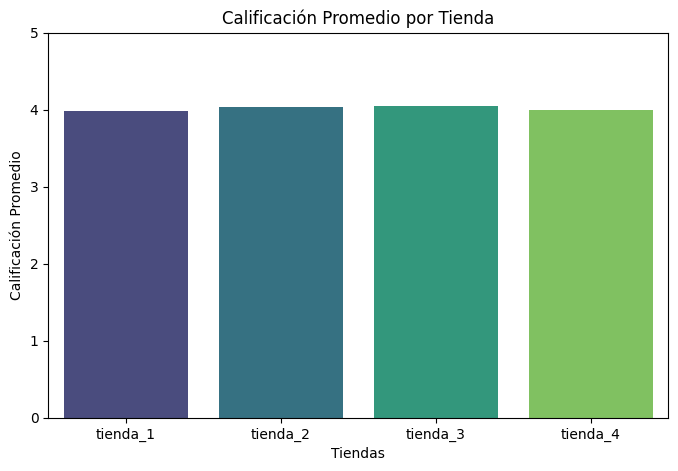

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=promedio_calificacion, x="Tiendas", y="Calificación Promedio", palette="viridis")
plt.title("Calificación Promedio por Tienda")
plt.ylim(0,5)
plt.show()

# 4. Productos más y menos vendidos

In [11]:
top_productos = productos_mas_vendidos.sort_values(["tienda", "cantidad_vendida"], ascending=[True, False])
top5_por_tienda = top_productos.groupby("tienda").head(5)

print(top5_por_tienda)

       tienda                   Producto  cantidad_vendida
1    tienda_1                    Armario                60
33   tienda_1                 Microondas                60
48   tienda_1              TV LED UHD 4K                60
40   tienda_1           Secadora de ropa                58
9    tienda_1    Bloques de construcción                56
75   tienda_2  Iniciando en programación                65
84   tienda_2                 Microondas                62
58   tienda_2                    Batería                61
72   tienda_2          Guitarra acústica                58
89   tienda_2                  Pandereta                58
129  tienda_3              Kit de bancas                57
113  tienda_3                  Cama king                56
133  tienda_3            Mesa de comedor                56
134  tienda_3              Mesa de noche                55
143  tienda_3               Set de ollas                55
163  tienda_4                   Cama box                

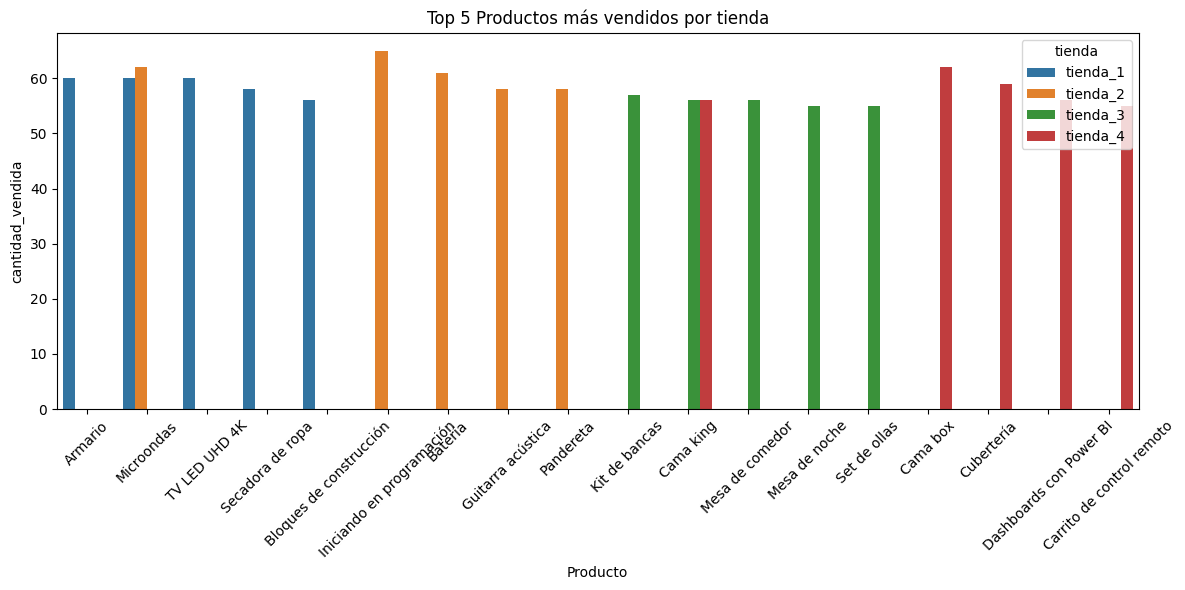

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top5_por_tienda, x="Producto", y="cantidad_vendida", hue="tienda")
plt.title("Top 5 Productos más vendidos por tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [36]:
envio_promedio = tiendas.groupby("tienda")["Costo de envío"].mean().reset_index()
envio_promedio.columns = ["Tienda", "Envío Promedio"]

print(envio_promedio)

     Tienda  Envío Promedio
0  tienda_1    26018.609580
1  tienda_2    25216.235693
2  tienda_3    24805.680373
3  tienda_4    23459.457167


/tmp/ipython-input-29-1993086299.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envio_promedio, x="Tienda", y="Envío Promedio", palette="coolwarm")


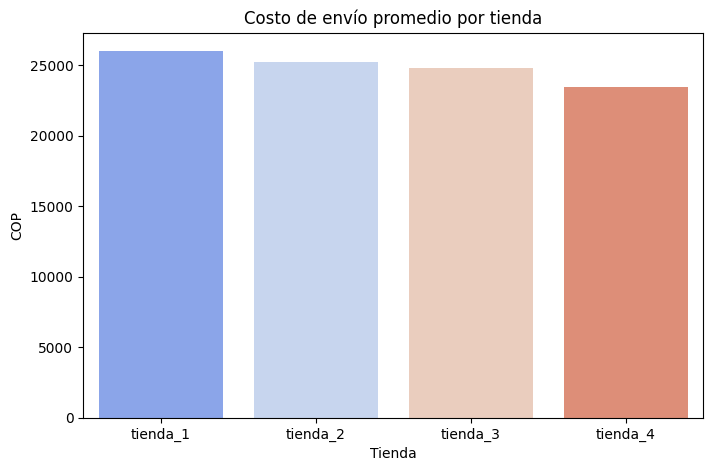

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=envio_promedio, x="Tienda", y="Envío Promedio", palette="coolwarm")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("COP")
plt.show()